## 1. Setup and Load Data

### 1.1 Install dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\cacho\AppData\Local\Temp\pip-install-eqoyqhxs\tensorflow-gpu_2081649295a346c891a77579df4c069d\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.toml-

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

### 1.2 Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = "C:/Users/cacho/Downloads/CNN_IMAGE"

In [7]:
image_exts = ['jpeg','jpg','bmp','png']

In [8]:
image_exts[2]

'bmp'

In [15]:
data_dir = "C:/Users/cacho/Downloads/CNN_IMAGE"
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                if img is None:
                    print('Cannot read image, removing: {}'.format(image_path))
                    os.remove(image_path)
                else:
                    tip = imghdr.what(image_path)
                    if tip not in image_exts:
                        print('Image not in ext list, removing: {}'.format(image_path))
                        os.remove(image_path)
            except Exception as e:
                print('Issue with image {}, removing. Error: {}'.format(image_path, e))
                os.remove(image_path)


Image not in ext list, removing: C:/Users/cacho/Downloads/CNN_IMAGE\happy\depositphotos_65162857-stock-illustration-diverse-happy-people.jpg
Image not in ext list, removing: C:/Users/cacho/Downloads/CNN_IMAGE\happy\Happy20People.jpg
Image not in ext list, removing: C:/Users/cacho/Downloads/CNN_IMAGE\happy\smiling-woman_W6GFOSFAXA.jpg
Image not in ext list, removing: C:/Users/cacho/Downloads/CNN_IMAGE\happy\smiling-young-african-american-woman-260nw-2290057229.jpg
Image not in ext list, removing: C:/Users/cacho/Downloads/CNN_IMAGE\happy\traitshappypeople.jpg
Image not in ext list, removing: C:/Users/cacho/Downloads/CNN_IMAGE\sad\39681222.jpg
Image not in ext list, removing: C:/Users/cacho/Downloads/CNN_IMAGE\sad\depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list, removing: C:/Users/cacho/Downloads/CNN_IMAGE\sad\depositphotos_469568274-stock-photo-group-sad-people-go-social.jpg
Image not in ext list, removing: C:/Users/cacho/Downloads/CNN_IMAGE\sad\depressed-s

### 1.3 Load data

#### tf.data.Dataset??

In [16]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 177 files belonging to 2 classes.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
data_iterator = data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

In [28]:
len(batch) #2 parts images and labels

2

##### Input Shape for model

In [29]:
batch[0].shape

(32, 256, 256, 3)

In [30]:
batch[1]

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [35]:
### Class 0 = Happy People
### Class 1 = Sad People
### The code at the bottom does the test

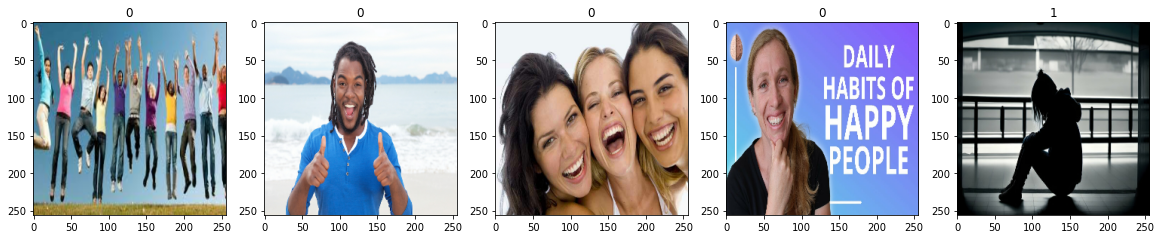

In [33]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [37]:
scaled = batch[0] /255

In [39]:
scaled.max()

1.0

## 2. Preprocess Data

### 2.1 Scale data

In [40]:
#x = Image
#y = labels
data = data.map(lambda x,y: (x/255,y))

In [47]:
scaled_iterator = data.as_numpy_iterator()

scaled_iterator.next()

In [45]:
data.as_numpy_iterator().next()[0].min() #or max

0.0

### 2.2 Split data

In [60]:
len(data) #number of batches

6

In [79]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
#Post training
test_size = int(len(data)*.1)+1

In [80]:
val_size+train_size+test_size

6

In [81]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [84]:
len(test)

1

## 3. Deep Model

### 3.1 Build Deep Learning Model

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [86]:
model = Sequential()

In [95]:
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))
                


In [96]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 16)      2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 16)      2320      
                                                                 
 conv2d_3 (Conv2D)           (None, 248, 248, 16)      2320      
                                                                 
 conv2d_4 (Conv2D)           (None, 246, 246, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 16)     0         
 )                                                               
                                                        

### 3.2 Train

In [99]:
import os

# Define the directory path
data_dir = "C:/Users/cacho/Downloads/CNN_IMAGE"
log_dir = os.path.join(data_dir, 'logs')

# Create the directory if it does not exist
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
    print(f"Directory '{log_dir}' created successfully.")
else:
    print(f"Directory '{log_dir}' already exists.")


Directory 'C:/Users/cacho/Downloads/CNN_IMAGE\logs' created successfully.


In [100]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [105]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 14s 5s/step - loss: 0.4939 - accuracy: 0.7812 - val_loss: 0.4243 - val_accuracy: 0.7812
Epoch 2/20
3/3 [==============================] - 14s 5s/step - loss: 0.4387 - accuracy: 0.8438 - val_loss: 0.3969 - val_accuracy: 0.8125
Epoch 3/20
3/3 [==============================] - 14s 5s/step - loss: 0.4399 - accuracy: 0.8021 - val_loss: 0.3461 - val_accuracy: 0.8750
Epoch 4/20
3/3 [==============================] - 15s 5s/step - loss: 0.4038 - accuracy: 0.8125 - val_loss: 0.3329 - val_accuracy: 0.8281
Epoch 5/20
3/3 [==============================] - 15s 5s/step - loss: 0.3231 - accuracy: 0.8438 - val_loss: 0.2299 - val_accuracy: 0.8750
Epoch 6/20
3/3 [==============================] - 15s 5s/step - loss: 0.3171 - accuracy: 0.8542 - val_loss: 0.2143 - val_accuracy: 0.9375
Epoch 7/20
3/3 [==============================] - 15s 5s/step - loss: 0.2639 - accuracy: 0.8958 - val_loss: 0.2001 - val_accuracy: 0.9062
Epoch 8/20
3/3 [==================

In [106]:
hist.history

{'loss': [0.49391546845436096,
  0.4386771023273468,
  0.43994975090026855,
  0.4038459062576294,
  0.3231215476989746,
  0.31707149744033813,
  0.26393166184425354,
  0.2193116545677185,
  0.16938535869121552,
  0.13563571870326996,
  0.14429542422294617,
  0.11126744747161865,
  0.04743910953402519,
  0.06811679154634476,
  0.06632452458143234,
  0.061397869139909744,
  0.05829298496246338,
  0.041395410895347595,
  0.02180922031402588,
  0.02329491265118122],
 'accuracy': [0.78125,
  0.84375,
  0.8020833134651184,
  0.8125,
  0.84375,
  0.8541666865348816,
  0.8958333134651184,
  0.9270833134651184,
  0.9583333134651184,
  0.96875,
  0.9479166865348816,
  0.96875,
  1.0,
  0.96875,
  0.96875,
  0.96875,
  0.96875,
  0.9895833134651184,
  1.0,
  0.9895833134651184],
 'val_loss': [0.4243318438529968,
  0.3968909978866577,
  0.3460600972175598,
  0.3328550457954407,
  0.22994105517864227,
  0.2143247127532959,
  0.2001444697380066,
  0.2641577124595642,
  0.1881904900074005,
  0.250401

### 3.3 Plot Performance

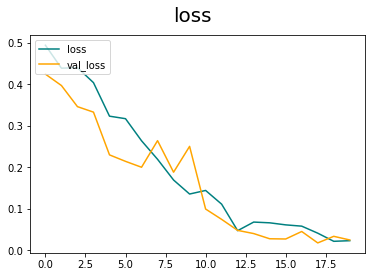

In [107]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize= 20)
plt.legend(loc= "upper left")
plt.show()

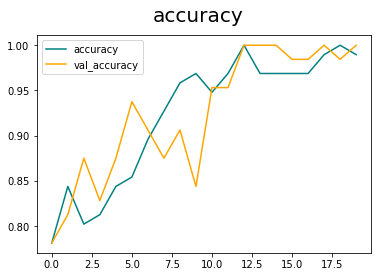

In [108]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize= 20)
plt.legend(loc= "upper left")
plt.show()

## 4. Evaluate Performance

### 4.1 Evaluate

In [109]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [110]:
pre = Precision()
re= Recall()
acc= BinaryAccuracy()

In [112]:
len(test)

1

In [111]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
    
# y true value
# yhat predicted value

1/1 [==============================] - 1s 590ms/step


In [115]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0, Accuracy:1.0


### 4.2 Test

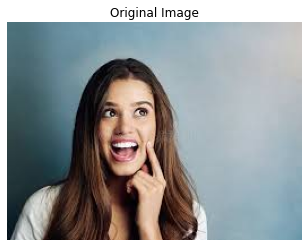

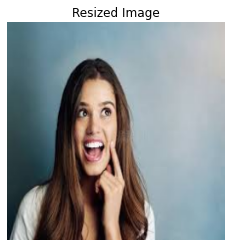

In [206]:
# Define the image file path
image_path = "C:/Users/cacho/Downloads/CNN_IMAGE/feliz_img3.jfif"

# Read the image using OpenCV
img = cv2.imread(image_path)

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(img_rgb)
plt.axis('off')  # Hide axes for a cleaner view
plt.title('Original Image')
plt.show()

# Convert the RGB image to a TensorFlow tensor
img_tensor = tf.convert_to_tensor(img_rgb, dtype=tf.float32)

# Resize the image using TensorFlow
resize = tf.image.resize(img_tensor, (256, 256))

# Convert the tensor to a NumPy array and ensure it has the correct data type
resize_np = resize.numpy().astype('uint8')

# Display the resized image
plt.imshow(resize_np)
plt.axis('off')  # Hide axes for a cleaner view
plt.title('Resized Image')
plt.show()


In [207]:
resize.shape

TensorShape([256, 256, 3])

In [208]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [209]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 50ms/step


In [210]:
yhat

array([[0.42236355]], dtype=float32)

In [211]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy


## 5. Save the model

### 5.1 Save the Model

In [212]:
from tensorflow.keras.models import load_model

In [213]:
# Define the path for the new models folder
models_dir = os.path.join(data_dir, 'models')

# Create the models directory if it doesn't exist
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
    print(f"Directory '{models_dir}' created successfully.")
else:
    print(f"Directory '{models_dir}' already exists.")


Directory 'C:/Users/cacho/Downloads/CNN_IMAGE\models' already exists.


In [214]:
# Define the path for the model file
model_path = os.path.join(models_dir, 'happysadmodel.h5')

# Assuming 'model' is your TensorFlow/Keras model
model.save(model_path)
print(f"Model saved to {model_path}")

Model saved to C:/Users/cacho/Downloads/CNN_IMAGE\models\happysadmodel.h5


In [215]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [216]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 217ms/step


In [218]:
yhatnew

array([[0.42236355]], dtype=float32)

In [217]:
if yhatnew > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is happy')

Predicted class is happy
